In [1]:
import pandas as pd
from plotting import plot_boxplots_and_outliers, plot_numeric_distributions, plot_value_counts, plot_correlation_matrix, plot_by_year_buckets

In [2]:
# load experimental/albums.json into dataframe
df = pd.read_json('../experimental/liked_songs_with_audio_features_and_genres.json')

In [3]:
df.head()

,added_at,id,uri,name,popularity,track_number,disc_number,explicit,duration_ms,album_id,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,sub_genre,main_genre
0,2024-05-07 21:42:01+00:00,2MJkQZEB0YNJbnQ59dZ0Pp,spotify:track:2MJkQZEB0YNJbnQ59dZ0Pp,Wish,67,1,1,False,156000,3yLxcdaNKhpogNECAju75d,...,1,0.0361,0.986,0.837000,0.0858,0.3440,160.134,4,indie,rock
1,2024-05-07 21:41:55+00:00,7q1jVcAVKoGHhX6tMiXe6D,spotify:track:7q1jVcAVKoGHhX6tMiXe6D,Please Stay,58,2,1,False,144204,1ghe8W4YxdcimjnpguMQTr,...,0,0.0288,0.931,0.900000,0.1160,0.4850,109.989,4,indie,rock
2,2024-05-04 11:21:04+00:00,4ZZ0RMb49n8hZZvXnxRsjo,spotify:track:4ZZ0RMb49n8hZZvXnxRsjo,Skimming Stones,33,7,1,False,137624,0ET7qPmTvZttpRARj5JSBA,...,1,0.1550,0.612,0.004090,0.1040,0.2710,86.547,4,hip hop,hip hop/rap
3,2024-05-04 09:29:16+00:00,4zIeRcsaho6lZuaXEYR1y3,spotify:track:4zIeRcsaho6lZuaXEYR1y3,Easier Said Than Done,74,3,1,False,174706,6ofJrAZaaX0iWTXYXObUxE,...,1,0.0246,0.668,0.000003,0.1320,0.5630,84.127,4,indie,rock
4,2024-05-03 20:00:43+00:00,6TLGmbTgp7hJ7jsDTTHRzw,spotify:track:6TLGmbTgp7hJ7jsDTTHRzw,Notion,60,3,1,False,340999,1jTdlev7AEaZWCDD2vBiQS,...,0,0.0300,0.390,0.008710,0.1880,0.0699,184.318,3,reggae,folk/world


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   added_at          358 non-null    datetime64[ns, UTC]
 1   id                358 non-null    object             
 2   uri               358 non-null    object             
 3   name              358 non-null    object             
 4   popularity        358 non-null    int64              
 5   track_number      358 non-null    int64              
 6   disc_number       358 non-null    int64              
 7   explicit          358 non-null    bool               
 8   duration_ms       358 non-null    int64              
 9   album_id          358 non-null    object             
 10  album_name        358 non-null    object             
 11  album_uri         358 non-null    object             
 12  artists           358 non-null    object             
 13  dance

In [5]:
# describe first 13 columns
df.iloc[:, :13].describe(include='all')

,added_at,id,uri,name,popularity,track_number,disc_number,explicit,duration_ms,album_id,album_name,album_uri,artists
count,358,358,358,358,358.000000,358.000000,358.000000,358,358.000000,358,358,358,358
unique,NaN,358,358,356,NaN,NaN,NaN,2,NaN,338,337,338,294
top,NaN,2MJkQZEB0YNJbnQ59dZ0Pp,spotify:track:2MJkQZEB0YNJbnQ59dZ0Pp,A Horse with No Name,NaN,NaN,NaN,False,NaN,340MjPcVdiQRnMigrPybZA,Donda,spotify:album:340MjPcVdiQRnMigrPybZA,[4Z8W4fKeB5YxbusRsdQVPb]
freq,NaN,1,1,2,NaN,NaN,NaN,318,NaN,4,4,4,8
mean,2023-04-23 06:27:13.458100480+00:00,NaN,NaN,NaN,49.622905,4.653631,1.008380,NaN,222697.039106,NaN,NaN,NaN,NaN
min,2018-11-16 10:48:03+00:00,NaN,NaN,NaN,0.000000,1.000000,1.000000,NaN,56574.000000,NaN,NaN,NaN,NaN
25%,2022-10-30 13:42:40.750000128+00:00,NaN,NaN,NaN,41.000000,1.000000,1.000000,NaN,163145.500000,NaN,NaN,NaN,NaN
50%,2023-05-01 11:01:21.500000+00:00,NaN,NaN,NaN,53.000000,3.000000,1.000000,NaN,212209.000000,NaN,NaN,NaN,NaN
75%,2023-11-26 13:07:59+00:00,NaN,NaN,NaN,65.000000,7.000000,1.000000,NaN,260839.250000,NaN,NaN,NaN,NaN
max,2024-05-07 21:42:01+00:00,NaN,NaN,NaN,98.000000,25.000000,2.000000,NaN,795768.000000,NaN,NaN,NaN,NaN


In [6]:
# describe the rest of the columns
df.iloc[:, 13:].describe(include='all')

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,sub_genre,main_genre
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358,358
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,7
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,indie,rock
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69,101
mean,0.558238,0.529089,5.511173,-10.327050,0.511173,0.056073,0.367950,0.438792,0.170093,0.384654,117.458000,3.896648,NaN,NaN
std,0.181943,0.229889,3.583910,5.285942,0.500575,0.053078,0.342253,0.393815,0.131850,0.244456,28.752016,0.458887,NaN,NaN
min,0.000000,0.003660,0.000000,-37.476000,0.000000,0.000000,0.000022,0.000000,0.033500,0.000000,0.000000,0.000000,NaN,NaN
25%,0.455250,0.396250,2.000000,-12.063500,0.000000,0.031500,0.038900,0.005848,0.097850,0.173500,97.255500,4.000000,NaN,NaN
50%,0.578500,0.537500,6.000000,-8.942000,1.000000,0.037700,0.250000,0.396000,0.116000,0.368500,119.001000,4.000000,NaN,NaN
75%,0.676000,0.688250,9.000000,-6.887750,1.000000,0.053225,0.668750,0.857750,0.178750,0.552250,132.088250,4.000000,NaN,NaN


In [7]:
# check NAs
df.isna().sum()

added_at            0
id                  0
uri                 0
name                0
popularity          0
track_number        0
disc_number         0
explicit            0
duration_ms         0
album_id            0
album_name          0
album_uri           0
artists             0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
sub_genre           0
main_genre          0
dtype: int64

In [8]:
# check the number of unique values for id, uri, name
print(f"In total, there are {df.shape[0]} tracks in the DataFrame.")
print(f"There are {df['id'].nunique()} unique values for 'id'.")
print(f"There are {df['uri'].nunique()} unique values for 'uri'.")
print(f"There are {df['name'].nunique()} unique values for 'name'.")

In total, there are 358 tracks in the DataFrame.
There are 358 unique values for 'id'.
There are 358 unique values for 'uri'.
There are 356 unique values for 'name'.


In [9]:
# get duplicates for name
df[df.duplicated(subset='name', keep=False)].sort_values('name')

,added_at,id,uri,name,popularity,track_number,disc_number,explicit,duration_ms,album_id,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,sub_genre,main_genre
180,2023-04-29 11:13:04+00:00,5Ea66YQ4u2nePfHsM5UezQ,spotify:track:5Ea66YQ4u2nePfHsM5UezQ,A Horse with No Name,47,3,1,False,275093,1TCONwUgvvjqSYJFPUCUTW,...,0,0.0413,0.13600,0.0735,0.1480,0.852,116.966,4,folk,folk/world
229,2023-01-08 10:55:52+00:00,54eZmuggBFJbV7k248bTTt,spotify:track:54eZmuggBFJbV7k248bTTt,A Horse with No Name,78,5,1,False,252239,0E5IKYhiKgbYQkmfsFonbZ,...,0,0.0534,0.68700,0.0147,0.1550,0.831,123.188,4,classic rock,rock
22,2024-04-22 17:08:18+00:00,3JcvpTfI64SmXxUl7XUvQI,spotify:track:3JcvpTfI64SmXxUl7XUvQI,Waltzing Back,59,1,1,False,192000,5j49mR7hcvrACDJZNVTmpu,...,0,0.0272,0.00331,0.9160,0.0935,0.487,104.972,4,indie pop,pop
328,2022-06-29 13:29:58+00:00,3Q1DprZauQyNo8KGlY8brZ,spotify:track:3Q1DprZauQyNo8KGlY8brZ,Waltzing Back,0,1,1,False,192000,5yHn5NJqFHuRscn44o9POq,...,0,0.0272,0.00331,0.9160,0.0935,0.487,104.972,4,indie pop,pop


Similar phenomenon as in the albums exploratory data analysis. We will remove the one that is not active anymore.

https://open.spotify.com/track/54eZmuggBFJbV7k248bTTt?si=7c3f7701dea54f9d

https://open.spotify.com/track/3JcvpTfI64SmXxUl7XUvQI?si=03a522d63f2f45aa

We got thise urls from spotify, which means the active ids are 54eZmuggBFJbV7k248bTTt and 3JcvpTfI64SmXxUl7XUvQI. We will remove rows with indices 180 and 328.

In [10]:
len(df)

358

In [11]:
# remove rows with index 180 and 328
df = df.drop([180, 328], axis=0)
# reset index
df = df.reset_index(drop=True)

In [12]:
len(df)

356

## Numeric columns

- **Acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- **Danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- **Energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- **Instrumentalness**: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- **Key**: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
- **Liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- **Loudness**: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
- **Mode**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- **Speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- **Tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- **Time signature**: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".
- **Valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

In [13]:
df.describe()

,popularity,track_number,disc_number,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000
mean,49.769663,4.668539,1.008427,222636.087079,0.557919,0.528783,5.519663,-10.334250,0.514045,0.056196,0.369625,0.438478,0.170370,0.383054,117.494455,3.896067
std,22.915098,4.328382,0.091540,89998.213503,0.182354,0.230499,3.585127,5.299423,0.500506,0.053199,0.342444,0.393632,0.132153,0.243820,28.825243,0.460112
min,0.000000,1.000000,1.000000,56574.000000,0.000000,0.003660,0.000000,-37.476000,0.000000,0.000000,0.000022,0.000000,0.033500,0.000000,0.000000,0.000000
25%,41.000000,1.000000,1.000000,162573.500000,0.454000,0.396000,2.000000,-12.081250,0.000000,0.031500,0.038900,0.005673,0.098150,0.172000,97.173500,4.000000
50%,53.000000,3.000000,1.000000,212209.000000,0.578500,0.536000,6.000000,-8.942000,1.000000,0.037700,0.254500,0.396000,0.116000,0.366000,119.041000,4.000000
75%,65.000000,7.000000,1.000000,260331.750000,0.676250,0.691500,9.000000,-6.884500,1.000000,0.053450,0.669500,0.857250,0.179500,0.550750,132.242500,4.000000
max,98.000000,25.000000,2.000000,795768.000000,0.988000,0.990000,11.000000,-1.786000,1.000000,0.354000,0.995000,0.987000,0.915000,0.968000,243.372000,5.000000


The most popular tracks.

In [14]:
df.sort_values(by='popularity', ascending=False).head(10)

,added_at,id,uri,name,popularity,track_number,disc_number,explicit,duration_ms,album_id,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,sub_genre,main_genre
55,2024-02-24 20:09:58+00:00,3qhlB30KknSejmIvZZLjOD,spotify:track:3qhlB30KknSejmIvZZLjOD,End of Beginning,98,6,1,False,159245,4JDXBZdRPId4devseaAOKH,...,1,0.0584,0.03510,0.002590,0.0707,0.9120,159.982,4,indie pop,pop
130,2023-08-15 17:38:33+00:00,1odExI7RdWc4BT515LTAwj,spotify:track:1odExI7RdWc4BT515LTAwj,Daylight,89,1,1,False,212953,6NcI39WPu4kY6Tul11nhSv,...,0,0.0335,0.83000,0.000441,0.0930,0.3240,130.090,4,indie pop,pop
254,2022-11-12 09:51:14+00:00,6me7F0aaZjwDo6RJ5MrfBD,spotify:track:6me7F0aaZjwDo6RJ5MrfBD,Evergreen,89,1,1,False,87000,2weOG4ZiOjfxiuFMsHm9JQ,...,1,0.0721,0.55700,0.004160,0.1090,0.5040,79.109,3,folk,folk/world
105,2023-10-12 22:31:27+00:00,3xKsf9qdS1CyvXSMEid6g8,spotify:track:3xKsf9qdS1CyvXSMEid6g8,Pink + White,89,3,1,False,184516,3mH6qwIy9crq0I9YQbOuDf,...,1,0.1070,0.66700,0.000055,0.4170,0.5490,159.940,3,r&b,pop
345,2021-10-16 21:47:36+00:00,0yc6Gst2xkRu0eMLeRMGCX,spotify:track:0yc6Gst2xkRu0eMLeRMGCX,Apocalypse,88,4,1,False,290616,2mxFsS5yylSTHNivV53HoA,...,1,0.0273,0.02050,0.566000,0.1090,0.1800,94.434,4,indie pop,pop
319,2022-08-03 09:59:40+00:00,4xF4ZBGPZKxECeDFrqSAG4,spotify:track:4xF4ZBGPZKxECeDFrqSAG4,snowfall,85,1,1,False,124065,4NRsGHlWBTl4rdLcq8CKcH,...,1,0.0269,0.92900,0.803000,0.4390,0.0841,95.014,4,electronica,electronic
277,2022-10-19 13:51:49+00:00,6QeYSvYqYUsfBzsApbjDHO,spotify:track:6QeYSvYqYUsfBzsApbjDHO,Cigarettes out the Window,85,3,1,False,198960,4oL7pMxnb04uuRI7ReXmuh,...,1,0.0337,0.12000,0.000000,0.1700,0.5940,113.551,4,indie pop,pop
101,2023-10-24 11:24:26+00:00,5gDWsRxpJ2lZAffh5p7K0w,spotify:track:5gDWsRxpJ2lZAffh5p7K0w,Stargirl Interlude,85,8,1,False,111626,4AdZV63ycxFLF6Hcol0QnB,...,0,0.0772,0.35300,0.092300,0.1040,0.4260,89.965,4,r&b,pop
272,2022-10-26 13:04:15+00:00,2xql0pid3EUwW38AsywxhV,spotify:track:2xql0pid3EUwW38AsywxhV,Reflections,84,10,1,False,244013,0ODLCdHBFVvKwJGeSfd1jy,...,0,0.0293,0.11400,0.046200,0.1160,0.5440,113.983,4,indie pop,pop
210,2023-02-08 21:13:43+00:00,5UWwZ5lm5PKu6eKsHAGxOk,spotify:track:5UWwZ5lm5PKu6eKsHAGxOk,Everlong,84,11,1,False,250546,30ly6F6Xl0TKmyBCU50Khv,...,0,0.0367,0.00006,0.000308,0.0805,0.3640,158.066,4,alternative,rock


Tracks with 0 popularity.

In [15]:
len(df[df['popularity'] == 0])

28

In [16]:
# 0 popularity
df[df['popularity'] == 0].head(5)

,added_at,id,uri,name,popularity,track_number,disc_number,explicit,duration_ms,album_id,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,sub_genre,main_genre
10,2024-04-23 17:30:55+00:00,3nGpFivjU5VlmZ1OQKMJob,spotify:track:3nGpFivjU5VlmZ1OQKMJob,A Sparrow Alighted Upon Our Shoulder,0,6,1,False,147093,22ohGwoKrvCaZYMmgTGfvR,...,0,0.0480,0.93800,0.8670,0.1240,0.0501,139.128,5,classical,classical/jazz
13,2024-04-23 13:45:44+00:00,5cf1ZfI16kHp3S1ySpQ36G,spotify:track:5cf1ZfI16kHp3S1ySpQ36G,"Ready, Able",0,7,1,False,257213,6FIFqclBriPCb0SjWDaHIk,...,1,0.0399,0.23000,0.7190,0.1110,0.2320,152.572,3,indie,rock
15,2024-04-23 13:13:19+00:00,5uBK8Ap1BCEc4GgMcEjeic,spotify:track:5uBK8Ap1BCEc4GgMcEjeic,Rum Rage,0,4,1,False,252299,5yAEbZfVzTlk5Uwi1IWZ0O,...,1,0.0291,0.87300,0.0000,0.0895,0.3620,131.851,4,reggae,folk/world
92,2023-11-26 13:07:30+00:00,4R8ehD0dbFImvlg169FgAa,spotify:track:4R8ehD0dbFImvlg169FgAa,boy,0,1,1,False,163750,6CFo3SA0dRU4USc4KoWmLy,...,1,0.0317,0.32700,0.0568,0.2140,0.1510,145.914,4,other,other
134,2023-08-09 18:19:05+00:00,5BvTfZQrTgu4buyXOekT3F,spotify:track:5BvTfZQrTgu4buyXOekT3F,Wide Eyes,0,1,1,False,266440,0fotfoDi4S3jE6qH2X4NSP,...,0,0.0403,0.00111,0.4580,0.2250,0.4760,123.126,4,indie,rock


In [17]:
added_at = df["added_at"] - df["added_at"].max()
added_at = added_at.apply(lambda x: x.days)
added_at.name = 'added_at_numeric'

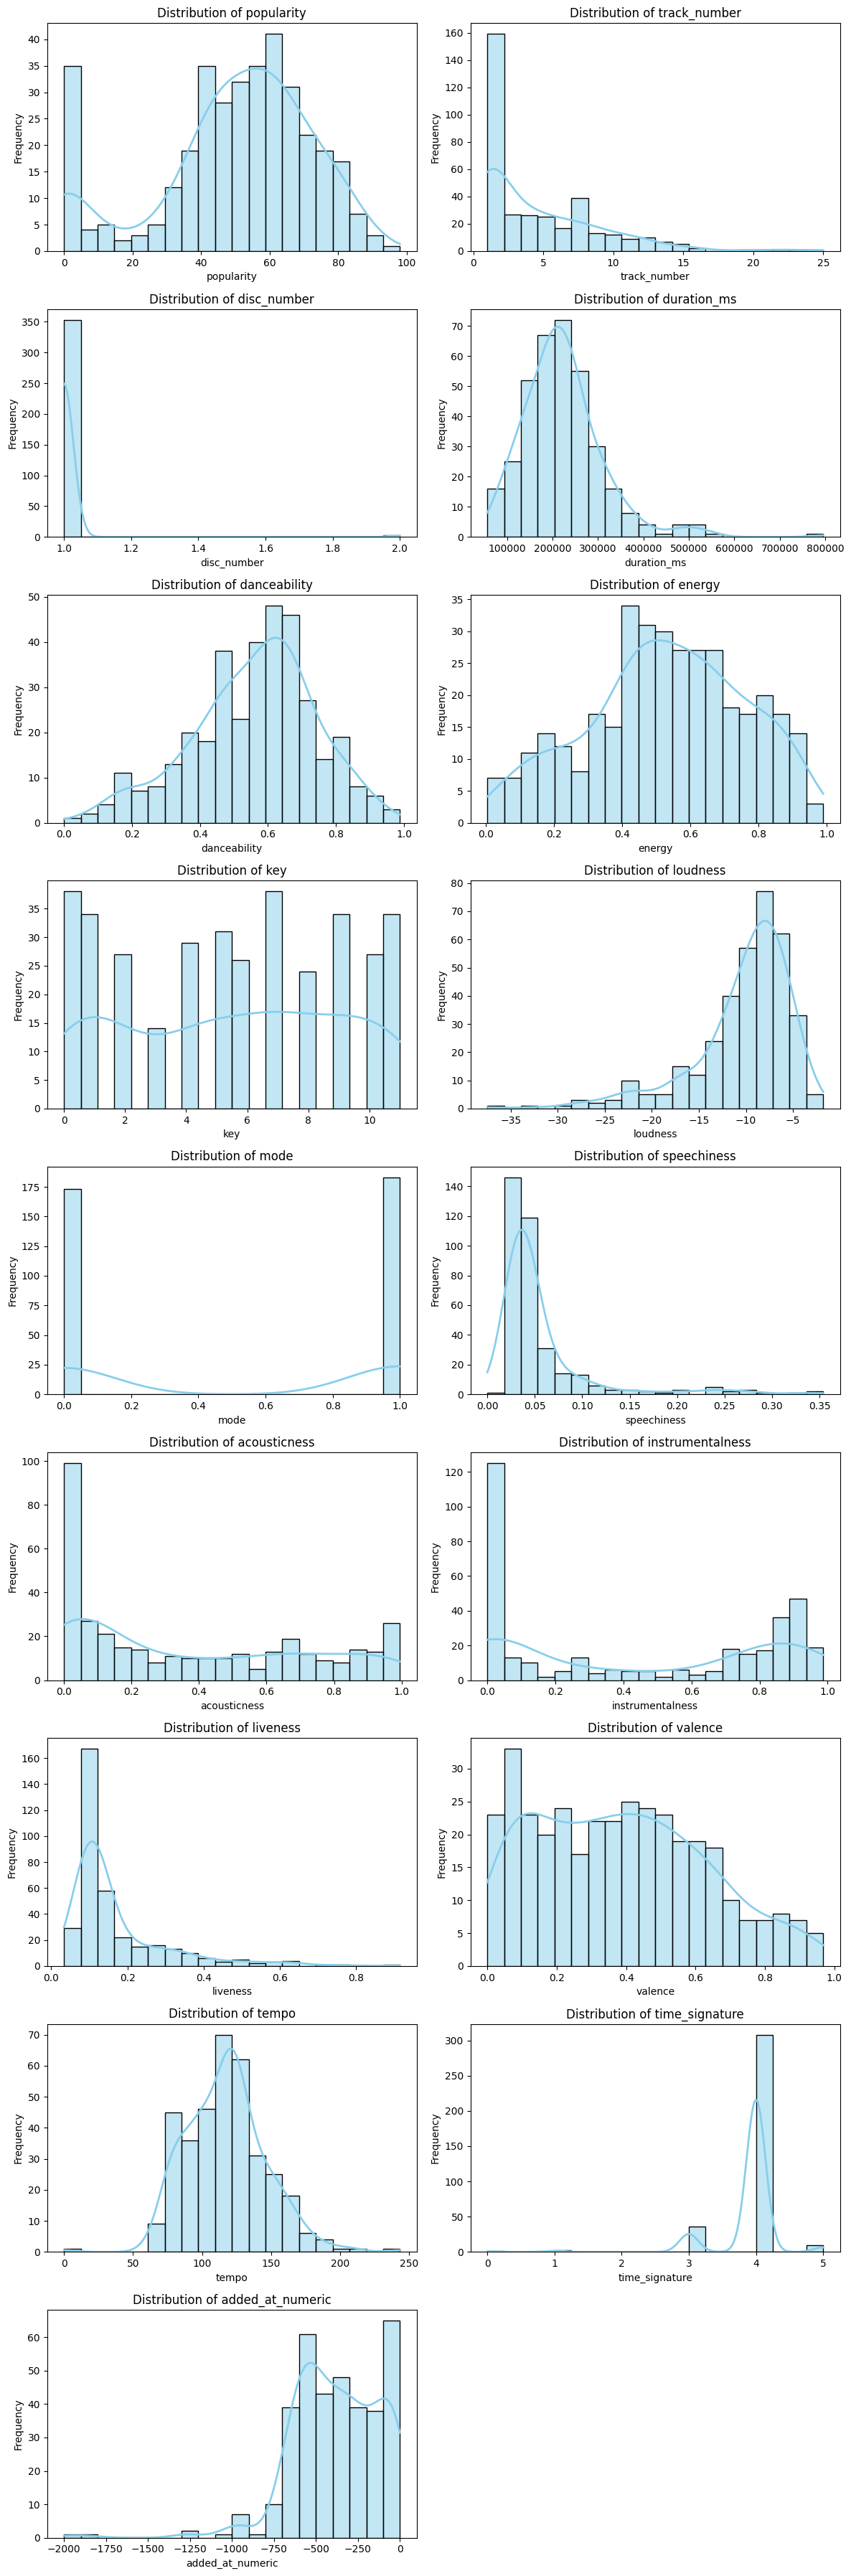

In [18]:
plot_numeric_distributions(df.join(added_at))

Note: For the last plot *Distribution of added_at_numeric* we are plotting the difference between a song being added and the most recently added song. Since we are using a standard function the x-axis is not labeled very informatively. 

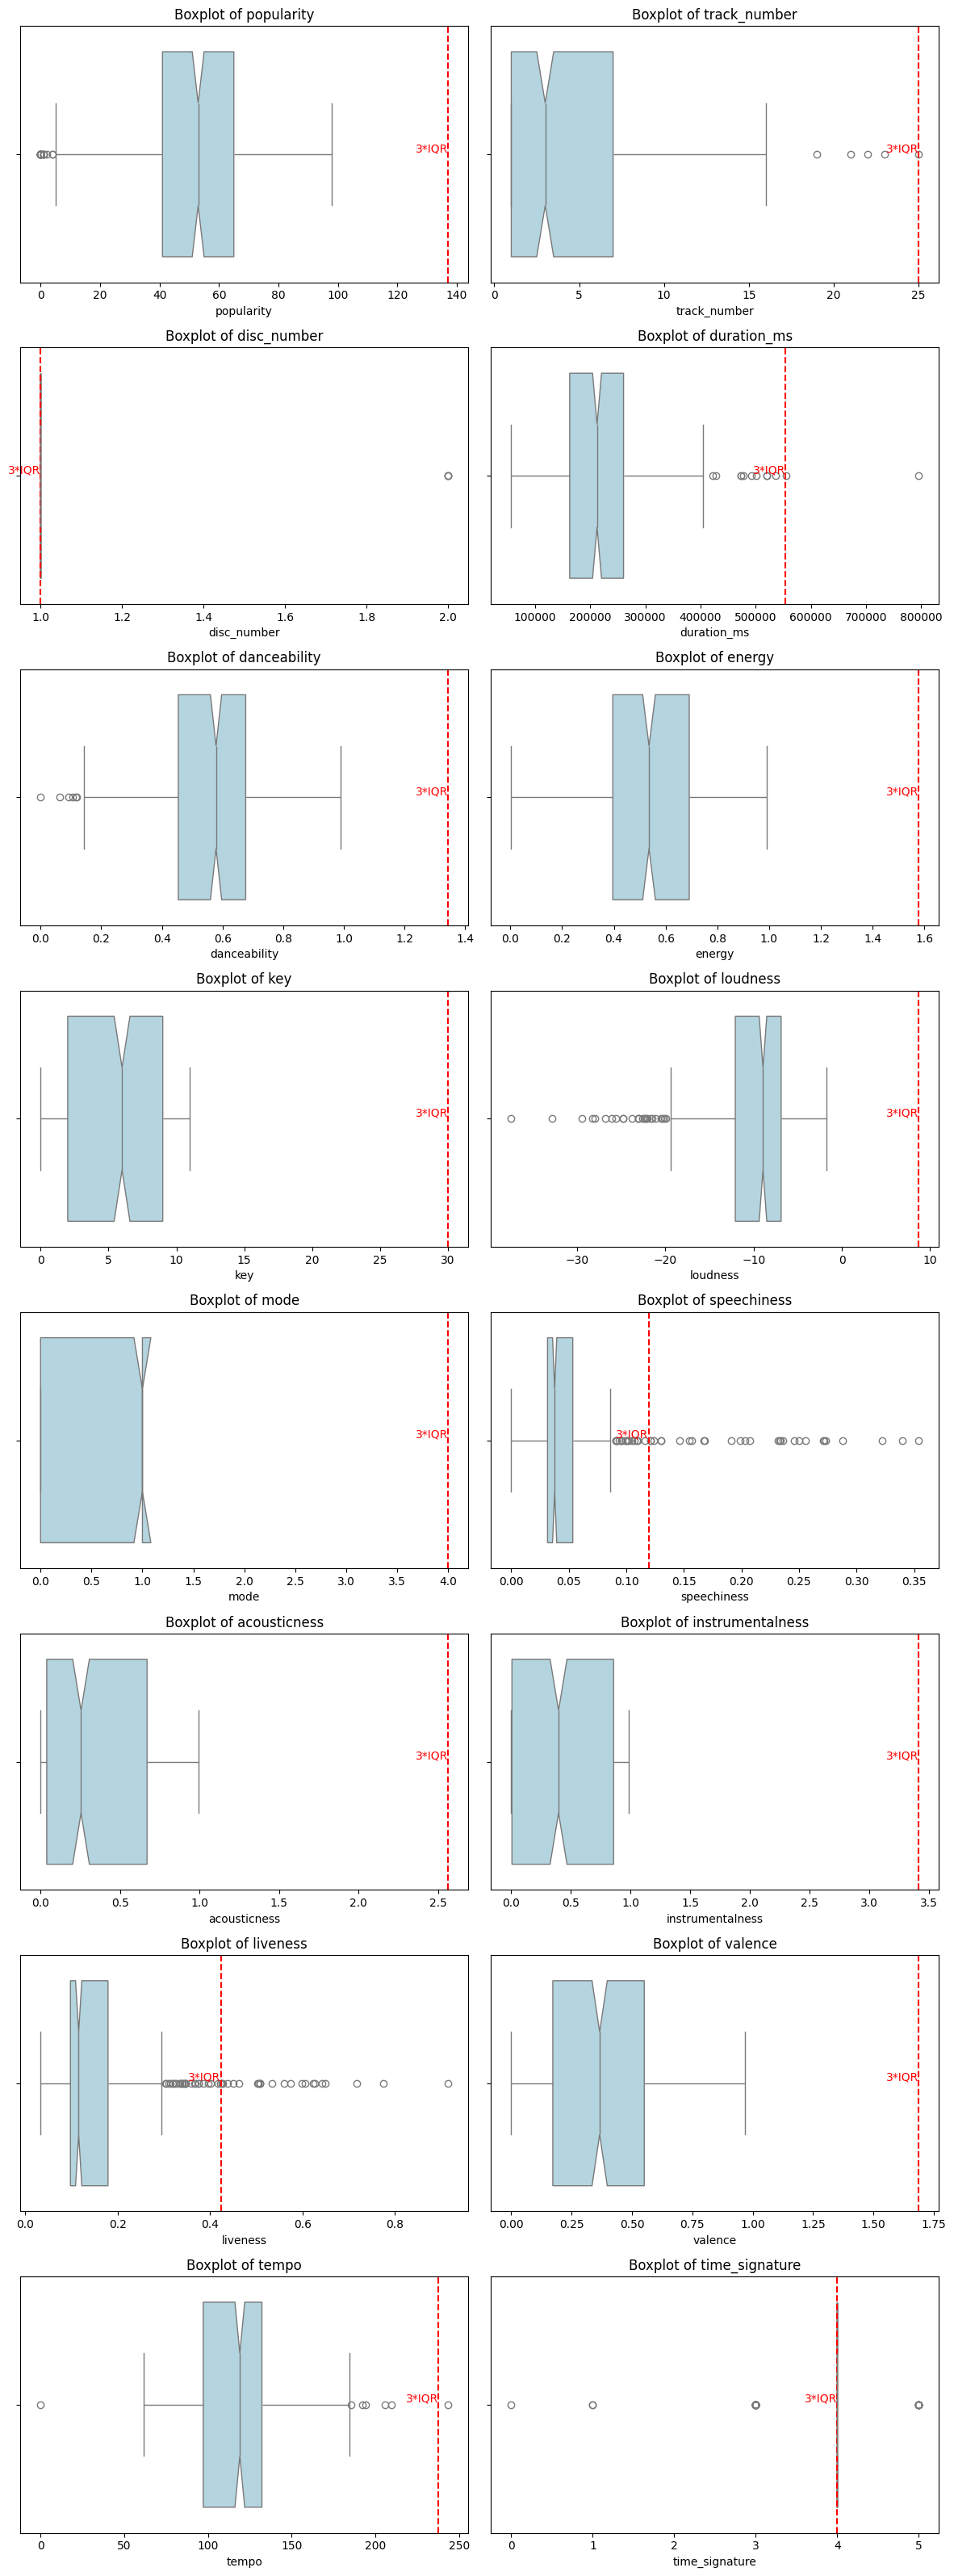

In [ ]:
plot_boxplots_and_outliers(df)

Long songs.

In [ ]:
# get rows with duration above 550000
df[df['duration_ms'] > 550000]

,added_at,id,uri,name,popularity,track_number,disc_number,explicit,duration_ms,album_id,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,sub_genre,main_genre
69,2024-01-19 18:46:54+00:00,0ZX46fIoKOoGMwuhZDNcGx,spotify:track:0ZX46fIoKOoGMwuhZDNcGx,Chasing It,38,5,1,False,795768,0h75o5T2hxWKC8a5167tLg,...,1,0.0298,0.176,0.376,0.0729,0.405,104.982,4,electronica,electronic
226,2023-01-14 09:39:10+00:00,0cDQyfkR7kYIBITKccaDmN,spotify:track:0cDQyfkR7kYIBITKccaDmN,Harlem River,51,3,1,False,555883,0DP6oSVu75inYj3jJ7tvLR,...,0,0.0297,0.261,0.400,0.0953,0.485,118.669,4,indie,rock


In [ ]:
def extreme_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    ex_outliers = df[(df[column] < (q1 - 3 * iqr)) | (df[column] > (q3 + 3 * iqr))]
    # sort by column
    ex_outliers = ex_outliers.sort_values(column)
    return ex_outliers

In [ ]:
speechiness_extreme_outliers = extreme_outliers(df, 'speechiness')
speechiness_extreme_outliers.head()


,added_at,id,uri,name,popularity,track_number,disc_number,explicit,duration_ms,album_id,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,sub_genre,main_genre
113,2023-09-09 13:34:52+00:00,3RKLJPyyMZfwebsePAzqjL,spotify:track:3RKLJPyyMZfwebsePAzqjL,"I'm Good Luv, Enjoy.",78,8,1,True,134547,2755rVbg8SJCsmTe0FQTLa,...,1,0.121,0.083300,0.0000,0.213,0.954,130.012,4,hip hop,hip hop/rap
112,2023-09-10 21:50:26+00:00,7pv80uUHfocFqfTytu1MVi,spotify:track:7pv80uUHfocFqfTytu1MVi,Didn't Cha Know,72,2,1,False,238733,3cADvHRdKniF9ELCn1zbGH,...,0,0.121,0.484000,0.0127,0.284,0.816,135.276,4,r&b,pop
178,2023-05-03 09:08:45+00:00,5fbQCQt91LsVgXusFS0CCD,spotify:track:5fbQCQt91LsVgXusFS0CCD,Disorder - 2007 Remaster,67,1,1,False,209039,33qkK1brpt6t8unIpeM2Oy,...,0,0.124,0.000330,0.6920,0.176,0.740,84.696,4,indie,rock
332,2022-06-13 15:31:35+00:00,3EUEwYz1nDY13cJFkcCIP9,spotify:track:3EUEwYz1nDY13cJFkcCIP9,Venus,25,3,1,False,196067,5LOhLgrWGYYyxKTpwMA5W4,...,0,0.130,0.000997,0.8450,0.101,0.303,77.532,4,hip hop,hip hop/rap
278,2022-10-19 13:51:34+00:00,4SW84Xh0uzk0yYGGlAgg2B,spotify:track:4SW84Xh0uzk0yYGGlAgg2B,I Hope Youre Doing Okay,51,5,1,False,120997,7k3PdFJ8APzpSCwptwI9cT,...,0,0.130,0.760000,0.7840,0.229,0.397,123.946,4,indie,rock


In [ ]:
len(speechiness_extreme_outliers)

28

In [ ]:
# get extreme outliers for liveness with 3*IQR
liveness_extreme_outliers = extreme_outliers(df, 'liveness')
liveness_extreme_outliers.head()

,added_at,id,uri,name,popularity,track_number,disc_number,explicit,duration_ms,album_id,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,sub_genre,main_genre
238,2022-12-07 17:10:22+00:00,0WKmVAD4VWk5EdTyCFILi4,spotify:track:0WKmVAD4VWk5EdTyCFILi4,Needs,65,1,1,False,177479,1QP3qNaDwOJByK4D0WHOFE,...,0,0.1160,0.18900,0.0002,0.426,0.8550,118.981,4,indie,rock
232,2022-12-25 10:36:14+00:00,6WsQtlcIRjJK3ZUrY6OAuB,spotify:track:6WsQtlcIRjJK3ZUrY6OAuB,moon dance,0,1,1,False,131076,1op5u7GJ6yTQiwUwcLF5Mx,...,0,0.1910,0.71600,0.0396,0.427,0.6770,130.056,4,alternative,rock
319,2022-08-03 09:59:40+00:00,4xF4ZBGPZKxECeDFrqSAG4,spotify:track:4xF4ZBGPZKxECeDFrqSAG4,snowfall,85,1,1,False,124065,4NRsGHlWBTl4rdLcq8CKcH,...,1,0.0269,0.92900,0.8030,0.439,0.0841,95.014,4,electronica,electronic
341,2022-05-17 17:50:42+00:00,03Q3ytaGt02fUewWo9fJW0,spotify:track:03Q3ytaGt02fUewWo9fJW0,"Dead, Again",44,2,1,False,236000,08oR5PmpCJQ9FfWjsQtpXc,...,1,0.0250,0.03680,0.7610,0.451,0.4780,87.978,4,r&b,pop
326,2022-07-13 13:37:53+00:00,373cpRIXl9Uf0dGMk2w3LP,spotify:track:373cpRIXl9Uf0dGMk2w3LP,Acid,0,1,1,False,264820,3bT4WTtnM7yBJUcyYozbjg,...,0,0.0262,0.00296,0.7990,0.462,0.3650,80.001,3,indie,rock


In [ ]:
len(liveness_extreme_outliers)

22

In [ ]:
# get extreme outliers for tempo with 3*IQR
tempo_extreme_outliers = extreme_outliers(df, 'tempo')
tempo_extreme_outliers.head()

,added_at,id,uri,name,popularity,track_number,disc_number,explicit,duration_ms,album_id,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,sub_genre,main_genre
299,2022-09-07 06:27:53+00:00,55ROr3cl3yi4YRBgfpDy1d,spotify:track:55ROr3cl3yi4YRBgfpDy1d,Call The Doctor,59,2,1,False,147200,3cpNHI7xhNIosF9WjSk8Zh,...,0,0.0547,0.198,0.657,0.082,0.615,243.372,3,classic rock,rock


## Categorical columns

In [ ]:
df.columns

Index(['added_at', 'id', 'uri', 'name', 'popularity', 'track_number',
       'disc_number', 'explicit', 'duration_ms', 'album_id', 'album_name',
       'album_uri', 'artists', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'sub_genre', 'main_genre'],
      dtype='object')

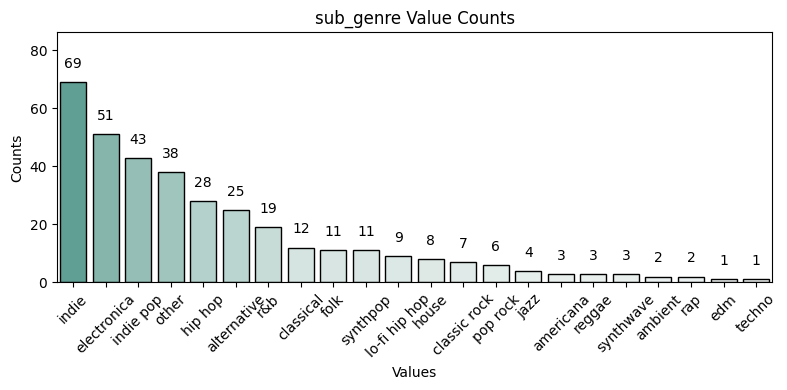

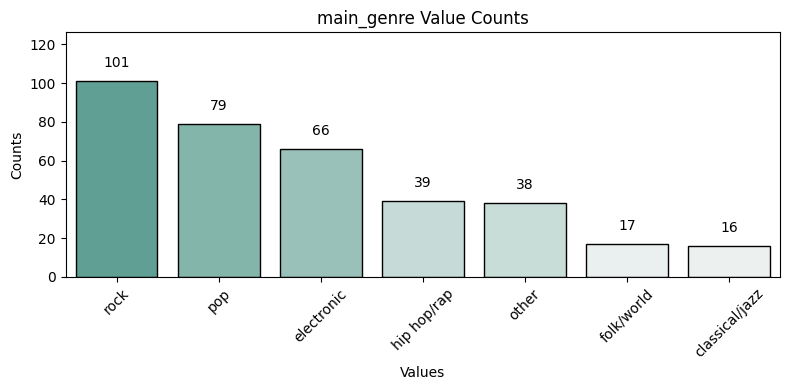

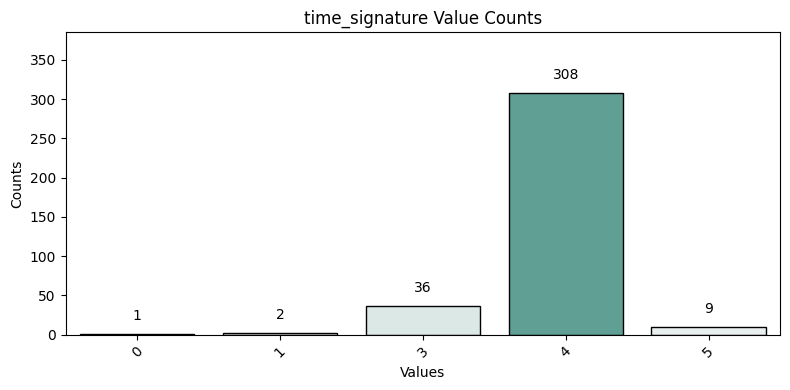

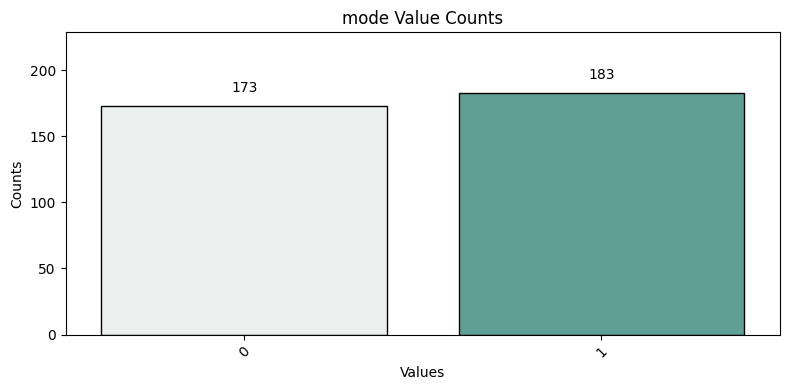

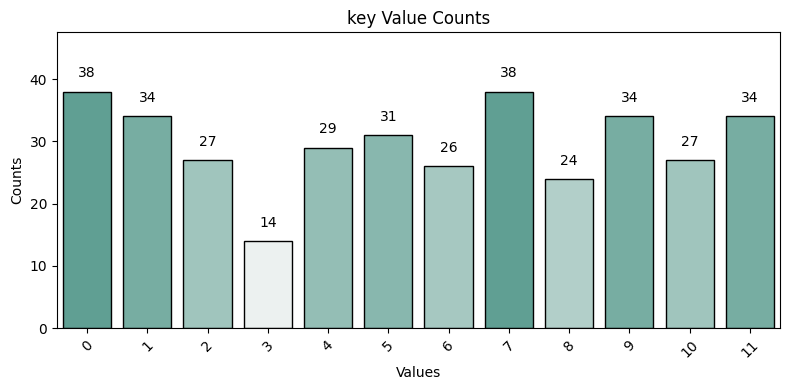

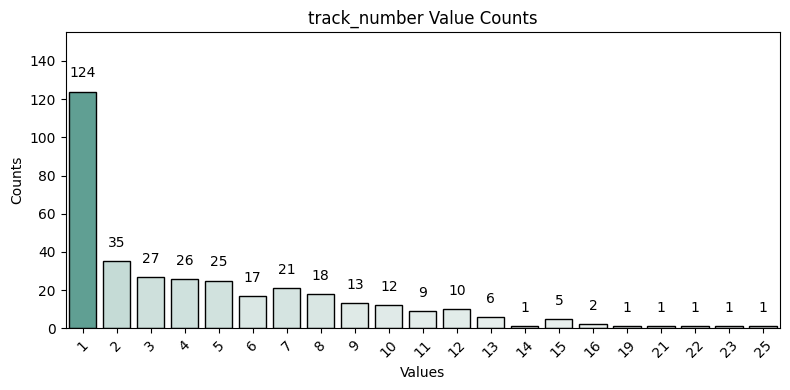

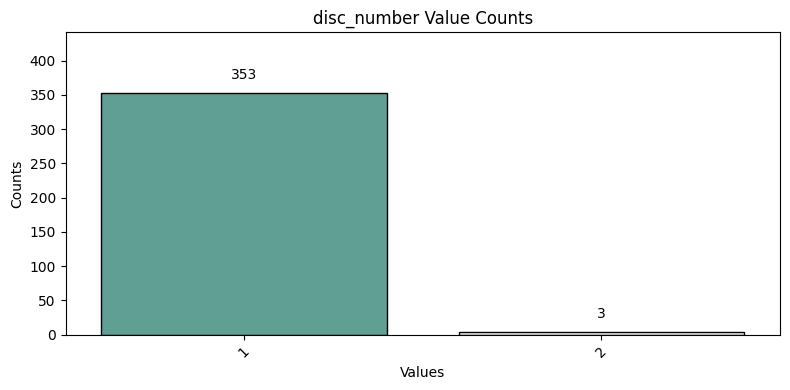

In [ ]:
columns_of_interest = ['sub_genre', 'main_genre', 'time_signature', 'mode', 'key', 'track_number', 'disc_number']
for column in columns_of_interest:
    plot_value_counts(df, column, f'{column} Value Counts', 8, 4)

In [ ]:
# change columns_of_interest to categorical
df[columns_of_interest] = df[columns_of_interest].astype('str')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   added_at          356 non-null    datetime64[ns, UTC]
 1   id                356 non-null    object             
 2   uri               356 non-null    object             
 3   name              356 non-null    object             
 4   popularity        356 non-null    int64              
 5   track_number      356 non-null    object             
 6   disc_number       356 non-null    object             
 7   explicit          356 non-null    bool               
 8   duration_ms       356 non-null    int64              
 9   album_id          356 non-null    object             
 10  album_name        356 non-null    object             
 11  album_uri         356 non-null    object             
 12  artists           356 non-null    object             
 13  dance

In [ ]:
# save to data/formatted_tracks.json
df.to_json('../data/formatted_tracks.json', orient='records')